<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


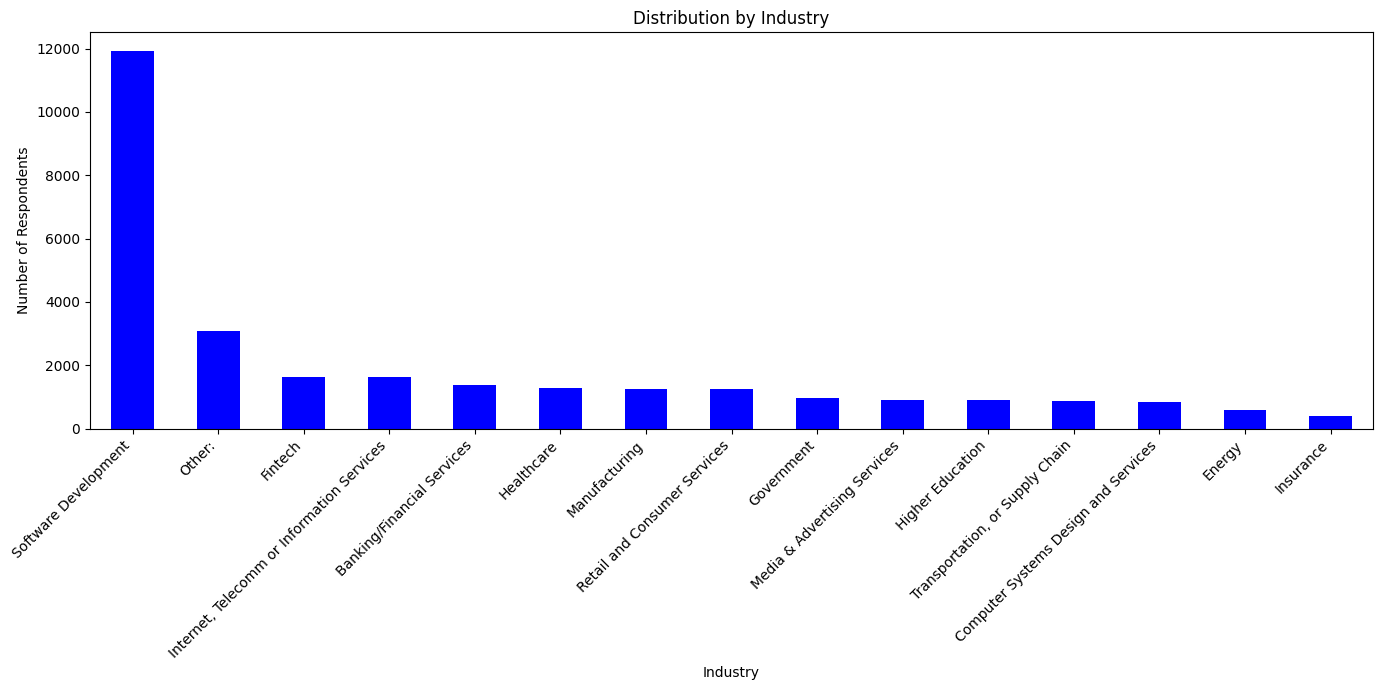

In [8]:
##Write your code here
industry_counts = df['Industry'].value_counts()

plt.figure(figsize=(14,7))
industry_counts.plot(kind='bar', color='blue')

plt.title('Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Software Development has a significantly higher number of respondents than other industries

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [24]:
##Write your code here
compensation_data = df['ConvertedCompYearly'].dropna()

mean_compensation = compensation_data.mean()
median_compensation = compensation_data.median()
std_compensation = compensation_data.std()

print(f"Mean: {mean_compensation:,.0f}")
print(f"Median: {median_compensation:,.0f}")
print(f"Standard Deviation: {std_compensation:,.0f}")

threshold = mean_compensation + 3 * std_compensation
print(f"Outlier Threshold: {threshold:,.0f}")

extreme_earners = df[df['ConvertedCompYearly'] > threshold]
print(f"Number of extreme high earners: {len(extreme_earners)}")
extreme_earners[['ConvertedCompYearly', 'Employment', 'Country', 'Industry']].head()

Mean: 86,155
Median: 65,000
Standard Deviation: 186,757
Outlier Threshold: 646,426
Number of extreme high earners: 89


,ConvertedCompYearly,Employment,Country,Industry
529,650000.0,"Employed, full-time",United States of America,Software Development
828,1000000.0,"Employed, full-time",United States of America,Retail and Consumer Services
1932,945000.0,"Employed, full-time",United States of America,Insurance
2171,750000.0,"Employed, full-time",United States of America,Banking/Financial Services
2187,2000000.0,"Employed, full-time",Gabon,NaN


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR: 75,259.50
Lower Bound: -80,177.25
Upper Bound: 220,860.75
Outliers: 978


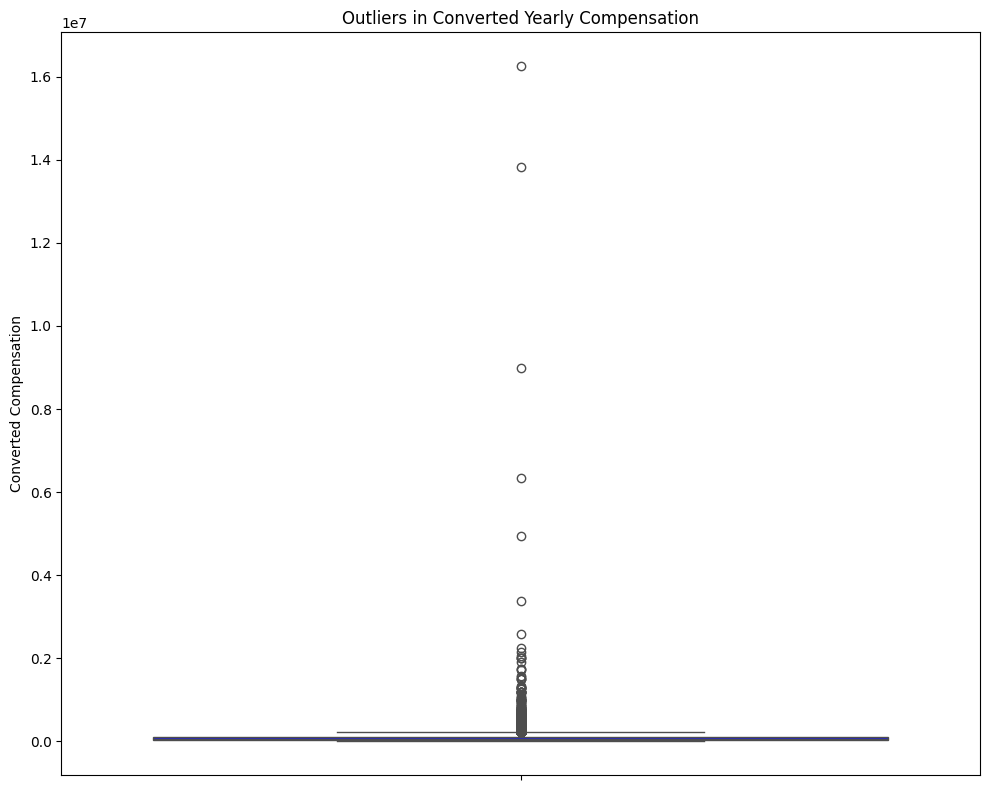

In [34]:
##Write your code here
compensation_data = df['ConvertedCompYearly'].dropna()

Q1 = compensation_data.quantile(0.25)
Q3 = compensation_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:,.2f}")
print(f"Lower Bound: {lower_bound:,.2f}")
print(f"Upper Bound: {upper_bound:,.2f}")

outliers = compensation_data[(compensation_data < lower_bound) | (compensation_data > upper_bound)]
print(f"Outliers: {len(outliers)}")

plt.figure(figsize=(10, 8))
sns.boxplot(y=compensation_data, color='blue')
plt.title('Outliers in Converted Yearly Compensation')
plt.ylabel('Converted Compensation')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [39]:
##Write your code here
df_new = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print(f"Original size: {len(df)}")
print(f"New size: {len(df_new)}")

Original size: 65437
New size: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [53]:
##Write your code here
print(df['Age'].unique())

age_map = {
    'Under 18 years old': 17, 
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_new.loc[:, 'AgeNumeric'] = df_new['Age'].map(age_map)

numeric_columns = ['AgeNumeric', 'ConvertedCompYearly', 'YearsCodePro', 'JobSat']
corr_df = df_new[numeric_columns].dropna()

correlation_matrix = corr_df.corr(method='pearson')
print(correlation_matrix)

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


ValueError: could not convert string to float: 'Less than 1 year'

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
